## Course: TM10007 - Machine learning
Editors: Lishia Vergeer, Amy Roos, Maaike Pruijt, Hilde Roording.

Description: The aim of this code is to predict the tumor grade of glioma’s(high or low) before surgery, 
based on features extracted from a combination of four MRI images: 
T2-weighted, T2-weighted FLAIR and T1-weighted before and after injection of contrast agent.

#### Import packages

In [386]:
# General packages
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets as ds
import seaborn as sns

# Import code
from brats.load_data import load_data

# Performance 
from sklearn.model_selection import train_test_split
from sklearn import decomposition
import seaborn
from matplotlib import pyplot as plt


# Pipeline and gridsearch
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

#preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
# scaler
from sklearn.preprocessing import RobustScaler



#Machine learning classifiers
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn import feature_selection 
from sklearn import preprocessing
from sklearn import neighbors
from sklearn.model_selection import ShuffleSplit
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn import svm
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsRegressor



C:\Users\hilde\miniconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


#### Load data

In [387]:
data_brats = load_data()

# Convert to dataframe
X = pd.DataFrame(data_brats)

# Print data 
print(f'The number of samples in data_brats: {len(X.index)}')
print(f'The number of columns in data_brats: {len(X.columns)}')

The number of samples in data_brats: 167
The number of columns in data_brats: 725


c:\Users\Lishia\Documents\Jaar_1\TM10007 - Machine Learning\Repositories\TM10007\brats\load_data.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(data2)


#### Split data in X and y
Split in X (data) and y (label)

In [388]:
# split column label from dataset X
y = X.pop('label')

#### Split data in train and test set
This function creates a panda dataframe and splits the data into test and train components.
This is done with test_size variable and the function train_test_split from the sklearn module.
Returns a train set with the data of 80% and a test set of 20% of the subjects.



In [389]:
# Split data in train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)  


#### Divergent values to NaN

In [390]:

# infinity to NaN
X_train[X_train==np.inf]=np.nan
X_test[X_test==np.inf]=np.nan

# non-numeric features to NaN
X_train = X_train.replace(['#DIV/0!'], np.nan)
X_train = X_train.apply(pd.to_numeric, errors='coerce')

X_test  = X_test.replace(['#DIV/0!'], np.nan)
X_test = X_test.apply(pd.to_numeric, errors='coerce')



#### Visualising outliers

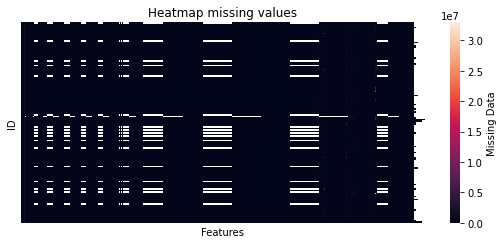

In [391]:
sns.heatmap(X_train, yticklabels=False, xticklabels=False, cbar_kws={'label': 'Missing Data'})
plt.title('Heatmap missing values')
plt.xlabel('Features')
plt.ylabel('ID')
plt.savefig("visualizing_missing_data_with_heatmap.png", dpi=100)

#### Outliers to NaN



In [392]:
for column in X_train:
    # Removing outliers
    q1 = X_train[column].quantile(0.25)
    q3 = X_train[column].quantile(0.75)
    iqr = q3-q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    print(column)

    # Information outliers
    outliers = [x for x in X_train[column] if x < lower or x > upper]
    outliers_removed = [x for x in X_train[column] if x >= lower and x <= upper]
    print('Identified outliers: %d' % len(outliers))
    print('Non-outlier observations: %d' % len(outliers_removed))


    X_train[column].loc[X_train[column] > upper] = np.nan
    X_train[column].loc[X_train[column] < lower] = np.nan

VOLUME_ET
Identified outliers: 6
Non-outlier observations: 127
VOLUME_NET
Identified outliers: 7
Non-outlier observations: 126
VOLUME_ED
Identified outliers: 2
Non-outlier observations: 131
VOLUME_TC
Identified outliers: 2
Non-outlier observations: 131
VOLUME_WT
Identified outliers: 0
Non-outlier observations: 133
VOLUME_BRAIN
Identified outliers: 3
Non-outlier observations: 130
VOLUME_ET_OVER_NET
Identified outliers: 11
Non-outlier observations: 122
VOLUME_ET_OVER_ED
Identified outliers: 11
Non-outlier observations: 121
VOLUME_NET_OVER_ED
Identified outliers: 17
Non-outlier observations: 115
VOLUME_ET_over_TC
Identified outliers: 0
Non-outlier observations: 133
VOLUME_NET_over_TC
Identified outliers: 0
Non-outlier observations: 133
VOLUME_ED_over_TC
Identified outliers: 16
Non-outlier observations: 117
VOLUME_ET_OVER_WT
Identified outliers: 0
Non-outlier observations: 133
VOLUME_NET_OVER_WT
Identified outliers: 0
Non-outlier observations: 133
VOLUME_ED_OVER_WT
Identified outliers: 0
N

C:\Users\Lishia\AppData\Local\Temp\ipykernel_13384\692173909.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[column].loc[X_train[column] > upper] = np.nan


VOLUME_NET_OVER_BRAIN
Identified outliers: 6
Non-outlier observations: 127
VOLUME_ED_over_BRAIN
Identified outliers: 2
Non-outlier observations: 131
VOLUME_TC_over_BRAIN
Identified outliers: 2
Non-outlier observations: 131
VOLUME_WT_OVER_BRAIN
Identified outliers: 0
Non-outlier observations: 133
DIST_Vent_TC
Identified outliers: 4
Non-outlier observations: 129
DIST_Vent_ED
Identified outliers: 22
Non-outlier observations: 110
INTENSITY_Mean_ET_T1Gd
Identified outliers: 1
Non-outlier observations: 115
INTENSITY_STD_ET_T1Gd
Identified outliers: 0
Non-outlier observations: 116
INTENSITY_Mean_ET_T1
Identified outliers: 0
Non-outlier observations: 116
INTENSITY_STD_ET_T1
Identified outliers: 1
Non-outlier observations: 115
INTENSITY_Mean_ET_T2
Identified outliers: 0
Non-outlier observations: 116
INTENSITY_STD_ET_T2
Identified outliers: 1
Non-outlier observations: 115
INTENSITY_Mean_ET_FLAIR
Identified outliers: 2
Non-outlier observations: 114
INTENSITY_STD_ET_FLAIR
Identified outliers: 3
No

#### Visualising missing data after removing outliers

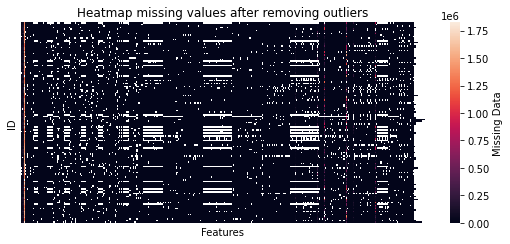

In [393]:
sns.heatmap(X_train, yticklabels=False, xticklabels=False, cbar_kws={'label': 'Missing Data'})
plt.title('Heatmap missing values after removing outliers')
plt.xlabel('Features')
plt.ylabel('ID')
plt.savefig("visualizing_missing_data_with_heatmap_outliers.png", dpi=100)


#### Drop columns

In [394]:
# If the total number of NaN observations in a column are greater than 40%, delete the entire column.
perc = 40.0
min_count = int(((100-perc)/100)*X_train.shape[0] + 1)
X_train_drop = X_train.dropna(axis=1, thresh=min_count)
X_labels = X_train_drop.keys()

X_test_drop = X_test[X_labels]

#### Fill the NaN observations.


In [395]:
data_fill_train = X_train_drop.fillna(X_train_drop.mean()) 
data_fill_test = X_test_drop.fillna(X_test_drop.mean()) 

#### Scale features

In [396]:
# Scaler
scaler = MinMaxScaler()
scaler.fit(data_fill_train)
X_train_scaled = scaler.transform(data_fill_train)
X_test_scaled = scaler.transform(data_fill_test)

#### Transform features

In [8]:
# Perform a PCA
pca = decomposition.PCA(n_components=5)
pca.fit(X_train_scaled) 
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
print(X_test_pca)

[[ 1.39806818e+00 -1.84533202e+00 -1.63062544e+00  1.05550238e+00
   2.81333981e-01]
 [ 1.69993002e+00  7.24768532e-03 -7.55289651e-01  5.78195208e-01
  -5.31147350e-01]
 [-3.53539670e+00  4.14671633e-01  5.89345870e-01 -2.49507877e-01
   7.51316627e-01]
 ...
 [ 1.17710738e+01  7.96674503e+00  3.25347950e+00  8.29213227e+00
   4.84441622e-01]
 [-3.22206162e+00 -5.03057728e+00  3.00273452e+00 -1.71835045e+00
   1.32774140e+00]
 [-4.13283135e+00  1.27807384e+00 -3.59982991e-01 -2.77522243e+00
  -1.18135075e+00]]


#### Test Classifiers

In [ ]:
#Confusion matrix, Accuracy, sensitivity and specificity
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
classifiers = (KNeighborsClassifier(), RandomForestClassifier(), SVC(kernel="rbf", C=0.025, probability=True), NuSVC(probability=True))

for cls in classifiers:
    model = cls
    model.fit(X_train_pca, y_train)

    preds = model.predict(X_train_pca)

    metrics.plot_confusion_matrix(model, X_train_pca, y_train)
    display_labels =['Negative', 'Positive']


    confusion = metrics.confusion_matrix(y_train, preds)
    accuracy = metrics.accuracy_score(y_train, preds)
    sensitivity = metrics.recall_score(y_train, preds, pos_label='GBM')
    specificity = metrics.recall_score(y_train, preds, pos_label='LGG')

    #table = {'classifier': cls, 'accuracy': accuracy, 'Sensitivity', sensitivity, 'Specificity': specificity}
    print(f'For classifier: {cls}, Accuracy: {accuracy}, Sensitivity: {sensitivity}, Specificity{specificity}')



#### Cross validation

In [ ]:
# Create a cross-validation object
cv = KFold(n_splits=5, shuffle= True, random_state = 1)

X = X_train_pca

y = y_train.values
y = np.where(y=='GBM', 1, y)
y = np.where(y=='LGG', 0, y)
y = y.tolist()

classifiers = (KNeighborsClassifier(), RandomForestClassifier(), SVC(kernel="rbf", C=0.025, probability=True), NuSVC(probability=True), DecisionTreeClassifier() )

score_dict = {}
for cls in classifiers:

    list_scores = cross_val_score(cls, X, y, scoring = 'accuracy', cv=cv)
    mean = np.mean(list_scores)
    #print(f'The accuracy of {cls} is: {list_scores}')
    print(f'The mean accuracy of classifier {cls}: {mean}')
    score_dict[cls] = mean

best_performing = max(score_dict, key=score_dict.get)
value_best_performing = score_dict[best_performing]
print(f'The best performing classifier is {best_performing} with mean value {value_best_performing}')

#### Random forest model with hyperparameters 
First define some hyperparameters 


In [9]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree 
#max_depth = [2, 4]
# Minimum number of samples required to split a node
#min_sample_split = [2, 5]
# Minimum number of samples required at each leaf node
#min_sample_leaf = [1, 2]
# Method of selecting samples for training each tree
#bootstrap = [True, False]

# Create a dictionary of the hyperparameters above (create a parameter grid)
param_grid = {
    'n_estimators': n_estimators, 
    'max_features': max_features} 

print(param_grid)

# param_grid = {
#     'n_estimators': n_estimators, 
#     'max_features': max_features, 
#     'max_depth':max_depth, 
#     'min_sample_split': min_sample_split, 
#     'min_sample_leaf':min_sample_leaf, 
#     'bootstrap': bootstrap }
# print(param_grid)

# Create an insance of the classifier
rf_model = RandomForestClassifier()

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_sample_split': [2, 5], 'min_sample_leaf': [1, 2], 'bootstrap': [True, False]}


Doing a Gridsearch 

In [ ]:
# We use the RF model, take the hyperparameters, cv = amount of folds, 
#rf_grid = GridSearchCV(estimator = rf_model, param_grid = param_grid, cv = 10, verbose = 2, n_jobs = 4)
#rf_grid.fit(X_train_pca, y_train)
#rf_grid.best_params_




In [10]:
# Doing a random grid search 
# A randomised grid search will perform worse than a gridsearch but it is faster 
rf_random_grid = RandomizedSearchCV(estimator = rf_model, param_distributions = param_grid, cv = 10, verbose = 2, n_jobs = 4)
rf_random_grid.fit(X_train_pca, y_train)
rf_random_grid.best_params_

#print (f' Train Accuracy: {rf_grid.score(X_train_pca, y_train):.3f}')
#print (f' Test Accuracy: {rf_grid.score(X_test_pca, y_test):.3f}')

print (f' Test Accuracy: {rf_random_grid.score(X_train_pca, y_train):.3f}')
print (f' Test Accuracy: {rf_random_grid.score(X_test_pca, y_test):.3f}')



Fitting 10 folds for each of 10 candidates, totalling 100 fits
